# Intro to Python and Jupyter

## 1. Quick Jupyter Notebook guide

Use **Arrow keys** to move up and down
***

Use **Enter** to activate cell and **ESC** to deactivate it
***

Use **CTRL+Enter** to execute cell (interpret Markdown or Python code)
***

While cell is deactivated (you are in Command mode) use **M** to turn cell into Markdown or **Y** to switch to Python
___

**a** adds cell above and **b** adds cell below (**ALT+Enter** execute and insert below)
___

Delete cell using **dd**
___

More shortcuts will pop up after pressing **H** (or **CTRL+SHIFT+H**)

---

Interactive command palette - **CTRL+SHIFT+C**

## 2. Markdown guide

[Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

## 3. Python intro

### 3.1. IPython

**Getting help**

In [ ]:
help(len)

In [ ]:
len.__doc__

In [ ]:
#IPython extended help function
?len

In [ ]:
def square(a):
    """Return the square of a."""
    return a**2

In [ ]:
#Access source code
square??

**Magic functions**

In [ ]:
#Measure average exec time
%timeit L = [n ** 2 for n in range(1000)]

In [ ]:
#Help on magic functions
%magic

In [ ]:
%%latex
$$x_i=\sum^N_{i=1}{e^i}$$

**Shell functions**

In [ ]:
%pwd

In [ ]:
# %cd - change directory
# %ls - list
# %cp - copy e.g. cp file1.csv folder/.
# %mkdir - make directory e.g. mkdir results
# %rm - remove file (or directory) e.g. rm python.py, rm -r folder

In [ ]:
!git

### 3.2. ML in Python

#### Python resources
Official tutorial

https://docs.python.org/3/tutorial/

'Think' Series by Allen B. Downey

https://greenteapress.com/wp/think-python-2e/


Free programming books on GoalKicker:

https://goalkicker.com/PythonBook/

Online courses: Datacamp, Coursera, CodeAcademy

**Data Science and ML in Python**

Scikit-learn documentation

https://scikit-learn.org/stable/

Seaborn documentation

https://seaborn.pydata.org/

Python Data Science Handbook

https://jakevdp.github.io/PythonDataScienceHandbook/

**'Production' ML project lifecycle (from "ML Engineering" by Andriy Burkov)**
![](./ML_Project_Cycle.PNG)

## Overfitting and dataset splits

Splitting data into training and validation set is done to avoid overfitting and to assess performance in more realistic situation (model will predict outcome on data it has never seen before).

[Related to Bias vs. Variance Tradeoff (Underfitting vs. Overfitting)](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#The-Bias-variance-trade-off)

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-validation-curve.png)

In [1]:
%pip install numpy matplotlib scikit-learn --upgrade

  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata (60 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
great-expectations 0.15.23 requires colorama>=0.4.3, which is not installed.
great-expectations 0.15.23 requires tqdm>=4.59.0, which is not installed.
great-expectations 0.15.23 requires urllib3<1.27,>=1.25.4, but you have urllib3 2.4.0 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score

In [3]:
def PolynomialReg(X: np.array, y: np.array, degree: int=2) -> Pipeline:
    return make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(
        X.reshape(-1, 1), y
    )

In [4]:
def true_process_with_noise(x: np.array, seed: int = 123) -> float:
    np.random.seed(seed)
    return 2 * np.log(x) + 0.4 * np.random.normal(size=x.size) + 2

In [5]:
n = 40
random.seed(24)
test = random.sample(range(n), int(n * 0.2))
mask = np.ones(n, bool)
mask[test] = False

In [6]:
x = np.linspace(2, 10, n)
random.seed(42)
y = true_process_with_noise(x)
X_train = x[mask]
y_train = y[mask]
X_test = x[~mask]
y_test = y[~mask]

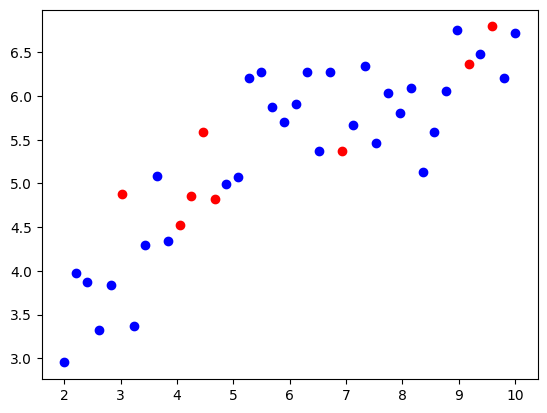

In [11]:
plt.plot(X_train, y_train, "bo")
plt.plot(X_test, y_test, "ro");

In [12]:
# Train polynomial regression with degree 1 and 20
model1 = PolynomialReg(X_train, y_train, 1)
model20 = PolynomialReg(X_train, y_train, 20)
# Predict values on train and test data
pred_train1 = model1.predict(X_train.reshape(-1, 1))
pred_train20 = model20.predict(X_train.reshape(-1, 1))
pred_test1 = model1.predict(X_test.reshape(-1, 1))
pred_test20 = model20.predict(X_test.reshape(-1, 1))

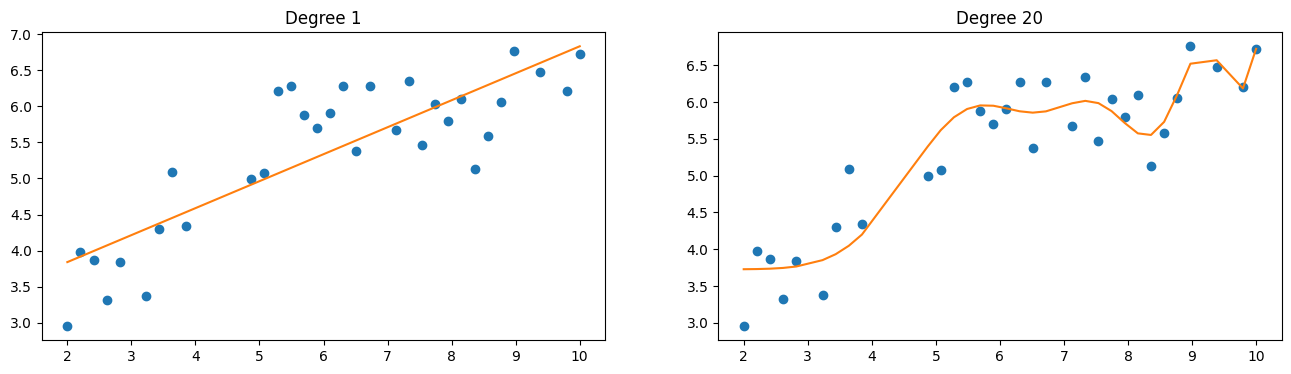

In [13]:
# Training data
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].plot(X_train, y_train, "o")
ax[0].plot(X_train, pred_train1)
ax[0].set_title("Degree 1")
ax[1].plot(X_train, y_train, "o")
ax[1].plot(X_train, pred_train20)
ax[1].set_title("Degree 20");

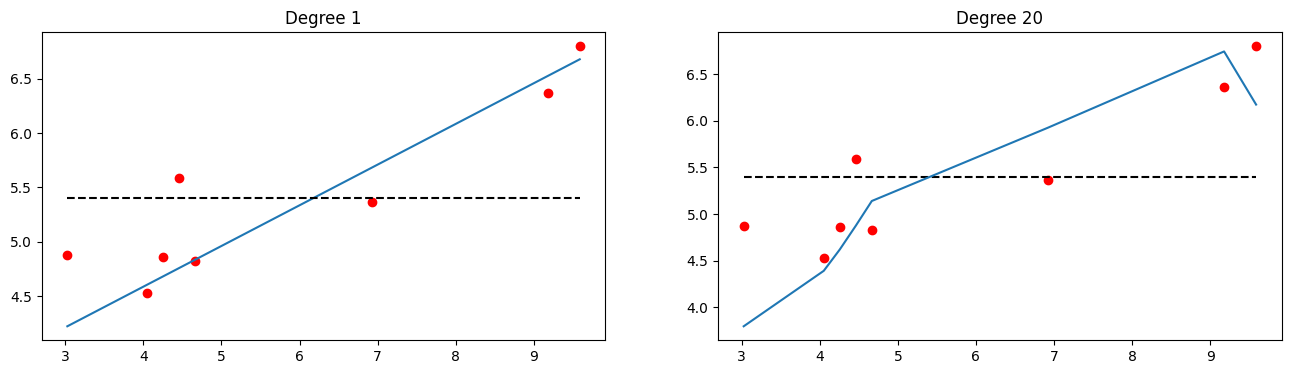

In [14]:
# Test data
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].plot(X_test, y_test, "ro")
ax[0].plot(X_test, pred_test1)
ax[0].plot(X_test, [np.mean(y_test)] * X_test.size, "k--")
ax[0].set_title("Degree 1")
ax[1].plot(X_test, y_test, "ro")
ax[1].plot(X_test, [np.mean(y_test)] * X_test.size, "k--")
ax[1].plot(X_test, pred_test20)
ax[1].set_title("Degree 20");

In [28]:
print(f"R^2 degree 1 on training data: {r2_score(pred_train1, y_train):.2}")
print(f"R^2 degree 20 on training data: {r2_score(pred_train20, y_train):.2}")
print(f"R^2 degree 1 on test data: {r2_score(pred_test1, y_test):.2}")
print(f"R^2 degree 20 on test data: {r2_score(pred_test20, y_test):.2}")

R^2 degree 1 on training data: 0.6
R^2 degree 20 on training data: 0.84
R^2 degree 1 on test data: 0.79
R^2 degree 20 on test data: 0.61


Handling overfitting:
- Gather more records (rows)
- Gather/produce more features (columns)
- Use less powerful/elastic/flexible model
- Use special data preparation or training techniques (balancing data, cross-validation)
- **Use regularization techniques**